# **Exercise 10.2**
# **healthy-or-pneumonia**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
directory = "/content/gdrive/My Drive/Datasets/pneumonia-or-healthy/"

In [ ]:
import pathlib

In [ ]:
path = pathlib.Path(directory)

In [ ]:
train_dir = path / 'training_set'
validation_dir = path / 'test_set'

In [ ]:
train_healthy_dir = train_dir / 'healthy'
train_pneumonia_dir = train_dir /'pneumonia'
validation_healthy_dir = validation_dir / 'healthy'
validation_pneumonia_dir = validation_dir / 'pneumonia'

In [ ]:
import os

In [ ]:
total_train = len(os.listdir(train_healthy_dir)) + len(os.listdir(train_pneumonia_dir))
total_val = len(os.listdir(validation_healthy_dir)) + len(os.listdir(validation_pneumonia_dir))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary')

Found 2750 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(img_height, img_width),
                                                              class_mode='binary')

Found 1180 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

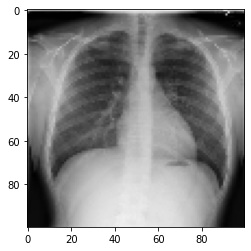

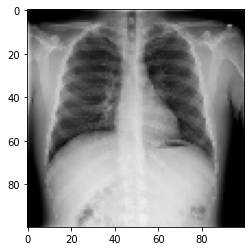

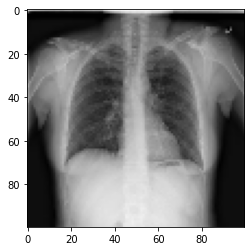

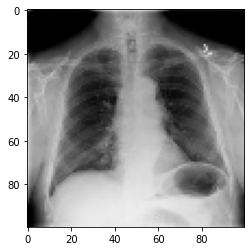

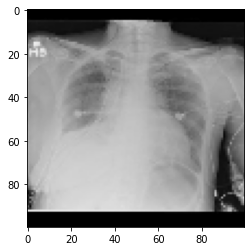

In [ ]:
for _ in range(5):
    img, label = train_data_gen.next()
    plt.imshow(img[0])
    plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,Add, AveragePooling2D, Flatten, Dense

In [ ]:
def relu_batchnorm_layer(input):
    return BatchNormalization()(ReLU()(input))

In [ ]:
def residual_block(input, filters: int, kernel_size: int = 3):
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        strides= (2), 
                        padding="same")(input)
    int_output = relu_batchnorm_layer(int_output)
    int_output = Conv2D(filters=filters, kernel_size=kernel_size, 
                        padding="same")(int_output)

    int_output2 = Conv2D(filters=filters, kernel_size=1, strides=2,
                        padding="same")(input)
    output = Add()([int_output2, int_output]) 

    output = relu_batchnorm_layer(output)
    return output

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
inputs = Input(shape=(100, 100, 3))

t = BatchNormalization()(inputs)
t = Conv2D(kernel_size=3,
           strides=1,
           filters=32,
           padding="same")(t)
t = relu_batchnorm_layer(t)

t = residual_block(t, filters=32)
    
t = AveragePooling2D(4)(t)
t = Flatten()(t)
outputs = Dense(1, activation='sigmoid')(t)
    
model = Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 100, 100, 3)  12          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 100, 100, 32) 896         batch_normalization_70[0][0]     
__________________________________________________________________________________________________
re_lu_67 (ReLU)                 (None, 100, 100, 32) 0           conv2d_75[0][0]                  
____________________________________________________________________________________________

In [ ]:
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5
85/85 [==============================] - 1592s 19s/step - loss: 0.5700 - accuracy: 0.7134 - val_loss: 0.7833 - val_accuracy: 0.4991
Epoch 2/5
85/85 [==============================] - 14s 165ms/step - loss: 0.5000 - accuracy: 0.7590 - val_loss: 0.6591 - val_accuracy: 0.5799
Epoch 3/5
85/85 [==============================] - 14s 162ms/step - loss: 0.4603 - accuracy: 0.7781 - val_loss: 0.5554 - val_accuracy: 0.6970
Epoch 4/5
85/85 [==============================] - 14s 162ms/step - loss: 0.4394 - accuracy: 0.7910 - val_loss: 0.5178 - val_accuracy: 0.7405
Epoch 5/5
85/85 [==============================] - 14s 161ms/step - loss: 0.4306 - accuracy: 0.7954 - val_loss: 0.5032 - val_accuracy: 0.7526
